# Занятие №3. 

In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
# Выполняем загрузку DatasetА

( x_train, y_train ), ( x_test, y_test ) = fashion_mnist.load_data()

In [0]:
import matplotlib.pyplot as plt

def output_image(data, N): # data - весь датасет, N - номер картинки
  image = data[N]
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
#plt.colorbar()
  plt.grid(False)
  plt.show()

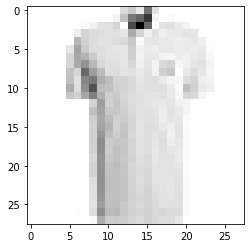

In [0]:
output_image(x_train, 35200)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()

model.add(Dense(512, input_shape=(784,)) )

model.add(Activation('sigmoid'))

model.add(Dense(256))

model.add(Activation('sigmoid'))

model.add(Dense(10))

model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

In [0]:
# ПАРАМЕТРЫ ПРЕДВАРИТЕЛЬНОЙ НАСТРОЙКИ НЕЙРОСЕТИ

from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), 
              metrics=['accuracy'])

# ПАРАМЕТРЫ ПРЕДВАРИТЕЛЬНОЙ НАСТРОЙКИ НЕЙРОСЕТИ

In [0]:
from keras import utils as np_utils

x_train_norm = x_train.reshape(60000,784)/255

y_train = np_utils.to_categorical(y_train, 10)

In [0]:
y_train[1000]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_test_norm = x_test.reshape(10000,784)/255
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
history = model.fit(x_train_norm, y_train, batch_size=100, epochs=25, validation_data=(x_test_norm,y_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 122us/step - loss: 0.6067 - acc: 0.7851 - val_loss: 0.4522 - val_acc: 0.8362
Epoch 2/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.3991 - acc: 0.8545 - val_loss: 0.4145 - val_acc: 0.8514
Epoch 3/25
60000/60000 [==============================] - 7s 119us/step - loss: 0.3654 - acc: 0.8661 - val_loss: 0.3970 - val_acc: 0.8594
Epoch 4/25
60000/60000 [==============================] - 7s 120us/step - loss: 0.3376 - acc: 0.8777 - val_loss: 0.3767 - val_acc: 0.8659
Epoch 5/25
60000/60000 [==============================] - 7s 120us/step - loss: 0.3197 - acc: 0.8834 - val_loss: 0.3504 - val_acc: 0.8745
Epoch 6/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.3005 - acc: 0.8888 - val_loss: 0.3563 - val_acc: 0.8684
Epoch 7/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.2881 - acc: 0.8937 - val_loss: 0.3372 - 

In [0]:
y_predict = model.predict(x_test_norm)

In [0]:
y_predict[1]

array([8.01130140e-04, 5.29612354e-09, 9.95902717e-01, 3.99887545e-09,
       3.20220483e-03, 9.39551104e-10, 9.39539168e-05, 1.22719846e-11,
       1.23012498e-08, 1.06060736e-13], dtype=float32)

In [0]:
y_test[20:40]

array([2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9],
      dtype=uint8)

In [0]:
import numpy as np

np.argmax(y_predict[20:40], axis=1)

array([2, 5, 7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9])

In [0]:
def nn_test(y_predict, y_test):
  count = 0
  for i in range(len(y_test)):
    if y_test[i] == np.argmax(y_predict[i]): count+=1
  return count/len(y_test)

In [0]:
nn_test(y_predict, y_test)

0.8923

НАСКОЛЬКО СИЛЬНО СЕТЬ ОШИБАЕТСЯ?????????????

In [0]:
x_test.shape

(10000, 28, 28)

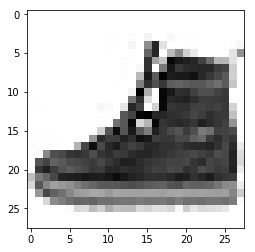

In [0]:
number_of_image = 2550
output_image(x_test, number_of_image)

In [0]:
y_test[number_of_image]

9

In [0]:
print(model.predict(x_test[number_of_image].reshape(1,784)))

np.argmax(model.predict(x_test[number_of_image].reshape(1,784)))

[[7.9985801e-04 2.0298406e-03 1.5520788e-03 9.1310515e-04 9.4157195e-04
  3.9689161e-02 8.3737192e-04 6.1180610e-02 5.2149384e-03 8.8684148e-01]]


9

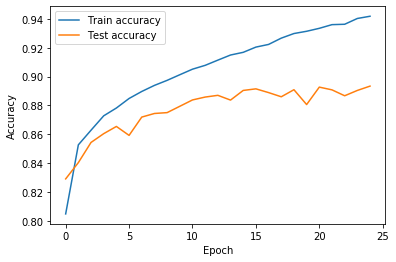

In [0]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()